#### **1. Import the Libraries**
---
- TensorFlow and Keras: Used for building and training deep learning models.  
- Matplotlib: Used for visualizing data, especially images and model performance.  
- NumPy: Used for numerical operations, particularly with arrays.  

In [5]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

#### **2. Setting Up Parameters**
---
- IMAGE_SIZE: The target size of the images after resizing.  
- BATCH_SIZE: Number of images processed in a single batch.  
- CHANNELS: Number of color channels (3 for RGB).  
- EPOCHS: Number of complete passes through the training dataset.

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3 # RGB
EPOCHS = 50 # Number of epochs for training     # Number of complete passes through the training dataset.

#### **3. Load the data in Tensorflow dataset**
---
- Loading Images: Images are loaded from a directory, resized, and batched.  
- Shuffling: The dataset is shuffled to ensure randomness during training.  
- **这段代码从名为“PlantVillage”的目录加载图像。图像被调整到 IMAGE_SIZE 并根据 BATCH_SIZE 进行批处理。数据集也被打乱，以确保随机性。**

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size= BATCH_SIZE
)

NameError: name 'tf' is not defined

In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

In [6]:
for image_batch, label_batch in dataset.take(1):
    print (image_batch.shape)
    print (label_batch.numpy())
    
# take(1) - take one batch of images and labels from the dataset
# image.shape - (32, 256, 256, 3) - 32 images of size 256x256 with 3 channels (batch_size, height, width, channels)
# label.numpy() - the labels (which are originally TensorFlow tensors) are converted to NumPy arrays.变成array

(32, 256, 256, 3)
[1 0 0 1 1 0 0 0 1 1 1 0 2 1 1 1 0 0 1 1 1 0 1 0 0 0 2 0 0 2 1 0]


#### **4. Visualizing the Dataset**
---
- Visualization: Displays a grid of 12 images with their corresponding labels to give you an idea of what the data looks like.
- **这一部分显示了数据集中12张图像及其对应的标签的网格。它有助于可视化图像及其标签的外观。**
- Batch Processing: The dataset.take(1) line retrieves one batch of images (32 images in this case). From this batch, the first 12 images are displayed.

tf.Tensor(
[[[170. 168. 179.]
  [173. 171. 182.]
  [176. 174. 185.]
  ...
  [154. 155. 173.]
  [151. 152. 170.]
  [149. 150. 168.]]

 [[171. 169. 180.]
  [173. 171. 182.]
  [175. 173. 184.]
  ...
  [155. 156. 174.]
  [153. 154. 172.]
  [151. 152. 170.]]

 [[171. 169. 180.]
  [172. 170. 181.]
  [172. 170. 181.]
  ...
  [156. 157. 175.]
  [155. 156. 174.]
  [154. 155. 173.]]

 ...

 [[134. 133. 141.]
  [138. 137. 145.]
  [125. 124. 132.]
  ...
  [101.  99. 112.]
  [113. 111. 124.]
  [140. 138. 151.]]

 [[102. 101. 109.]
  [142. 141. 149.]
  [121. 120. 128.]
  ...
  [ 97.  95. 108.]
  [119. 117. 130.]
  [137. 135. 148.]]

 [[138. 137. 145.]
  [135. 134. 142.]
  [109. 108. 116.]
  ...
  [ 96.  94. 107.]
  [126. 124. 137.]
  [126. 124. 137.]]], shape=(256, 256, 3), dtype=float32)


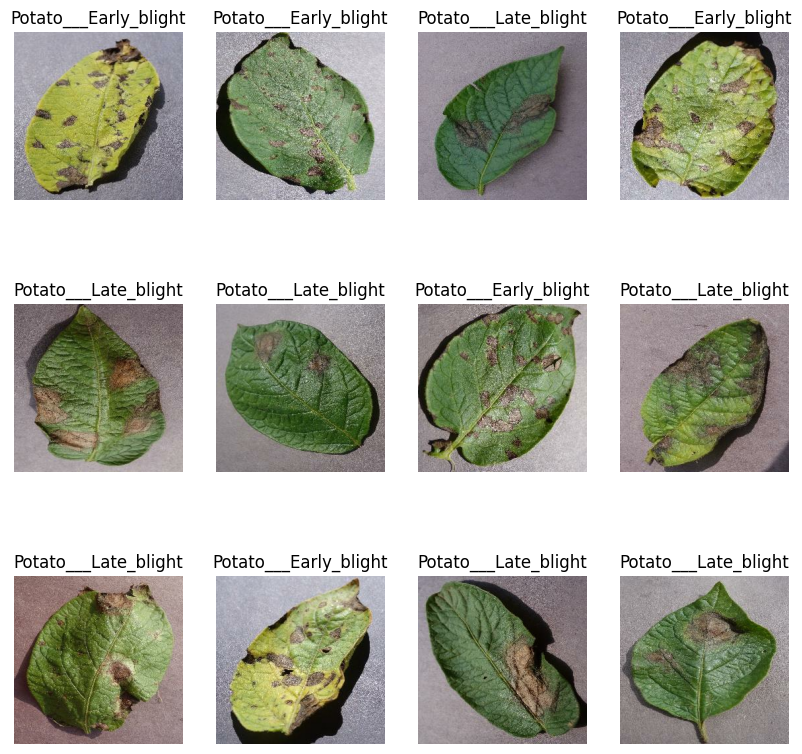

In [7]:
plt.figure(figsize=[10,10])
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i+1) # plt.subplot(nrows, ncols, index)
        # This line creates a subplot in a 3x4 grid (3 rows and 4 columns) within the figure. The variable ax holds the reference to the subplot.
        # The argument i+1 specifies the position of the subplot in the grid (subplots are numbered from 1 to 12).
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.axis("off")
        plt.title(class_names[label_batch[i]])
    print (image_batch[0])

# imshow - takes a 2D NumPy array data and displays it as an image. 

In [8]:
len(dataset)

68

#### **5. Splitting the Dataset**
---
**80% ==> training**  
**20% ==> 10% validation, 10% test**

In [9]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [10]:
train_dataset = dataset.take(54) # arr[:54]
len(train_dataset)

54

In [11]:
test_dataset = dataset.skip(54) # arr[54:]
len(test_dataset)

14

In [12]:
validation_size = 0.1
len(dataset)*validation_size

6.800000000000001

In [13]:
validation_dataset = test_dataset.take(6)
len(validation_dataset)

6

In [14]:
test_dataset = test_dataset.skip(6)
len(test_dataset)

8

In [15]:
def get_dataset_partition_tf(ds,train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 10000):
    dataset_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size,seed=12)
        # seed - 设置种子的主要目的是控制随机性，使其变得可复现。通过每次使用相同的种子值，您可以确保随机操作（如打乱、划分数据集等）在每次运行时产生相同的结果。
    train_size = int(train_split*dataset_size)
    val_size = int(val_split*dataset_size)
    
    train_dataset = dataset.take(train_size)
    validation_dataset = dataset.skip(train_size).take(val_size)
    test_dataset = dataset.skip(train_size).skip(val_size)
    return train_dataset, validation_dataset, test_dataset

In [16]:
#  it is possible to assign the return values of a function to multiple variables if the function returns multiple values.
train_dataset,validation_dataset,test_dataset = get_dataset_partition_tf(dataset)

In [17]:
len(train_dataset), len(validation_dataset), len(test_dataset)

(54, 6, 8)

#### **6. Data Preprocessing**
---
- **Caching**: Stores data in memory to speed up training.  
- **Shuffling**: Ensures randomness in the order of data.  
- **Prefetching**: Loads data in the background to improve performance.
  
- **缓存**：将数据存储在内存中以加快训练速度。cache() 函数在数据加载后将其存储在内存中，这通过防止多次从磁盘重新加载数据加速了训练过程。
- **打乱顺序**：确保数据顺序的随机性。shuffle(1000) 函数随机打乱数据集，以确保模型不会从数据的顺序中学习。
- **预取**：在后台加载数据以提高性能。 prefetch(buffer_size=tf.data.AUTOTUNE) 函数在模型训练时在后台加载数据，确保在需要时数据始终准备就绪，从而优化训练管道。

In [18]:
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_dataset = validation_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset = test_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [19]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255) # 它将像素值从 [0, 255] 范围缩放到 [0, 1] 范围
])
# resize_and_rescale 层将图像调整为所需的 IMAGE_SIZE 并将像素值从 [0, 255] 重缩放到 [0, 1]。

In [20]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])
# data augmentation - 层随机翻转和旋转图像，以人为地增加训练数据的多样性，帮助模型更好地泛化。

#### **7. Building the Model**
---
- Sequential Model: Defines the model architecture sequentially.
- **顺序模型**：按顺序定义模型架构。  
- Convolutional Layers (Conv2D): Extracts features from the images.
- **卷积层 (Conv2D)**：从图像中提取特征。
- MaxPooling Layers: Reduces the spatial dimensions, making the model more computationally efficient.
- **最大池化层 (MaxPooling)**：减少空间维度，使模型在计算上更高效。
- Flatten Layer: Converts the 2D matrix to a 1D vector.
- **展平层 (Flatten)**：将2D矩阵转换为1D向量。
- Dense Layers: Fully connected layers for classification.
- **全连接层 (Dense)**：用于分类的全连接层。
- Output Layer: Uses a softmax activation function to predict class probabilities.
- **输出层**：使用softmax激活函数来预测类别概率。

* 顺序模型：Keras 的 Sequential 模型允许您逐层构建模型。这适用于具有单一输入和输出的简单模型。
* 调整大小和重缩放：resize_and_rescale 层将图像调整为所需的 IMAGE_SIZE 并将像素值从 [0, 255] 重缩放到 [0, 1]。
* 数据增强：data_augmentation 层随机翻转和旋转图像，以人为地增加训练数据的多样性，帮助模型更好地泛化。
* Conv2D 层：卷积层（例如 Conv2D）用于从图像中提取特征，如边缘、纹理和模式。第一个参数 (32) 是滤波器的数量，(3, 3) 定义了滤波器的大小。
* MaxPooling2D 层：这些层减少特征图的空间维度，通过仅保留最重要的信息使模型在计算上更高效。
* Flatten 层：将 2D 特征图转换为 1D 向量，然后可以将其传递给全连接层。
* Dense 层：这些是全连接层，根据卷积层提取的特征执行最终分类。
* 输出层：最终的 Dense 层使用 softmax 激活函数输出每个类别的概率。

In [58]:
# Correct input shape without the batch size
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.Input(shape=input_shape),
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(n_classes, activation="softmax")
])


In [59]:
model.summary()

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_16 (Sequential)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_17 (Sequential)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_132 (Conv2D)             │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_132               │ (None, 127, 127, 32)   │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_133 (Conv2D)             │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_133               │ (None, 62, 62, 64)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_134 (Conv2D)             │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_134               │ (None, 30, 30, 64)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_135 (Conv2D)             │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_135               │ (None, 14, 14, 64)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_136 (Conv2D)             │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_136               │ (None, 6, 6, 64)       │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_137 (Conv2D)             │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_137               │ (None, 2, 2, 64)       │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_22 (Flatten)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

#### **8. Compiling the Model**
---
- Optimizer: Adam is used to update the model's weights.
- Loss Function: Sparse Categorical Crossentropy measures the error between predicted and actual class labels.
- Metrics: Accuracy is used to evaluate the model’s performance.
- **优化器**：Adam用于更新模型的权重。adam 优化器用于调整模型的权重以最小化损失。Adam 是一个流行的选择，因为它在训练期间会调整学习率，这通常会导致更快的收敛。
- **损失函数**：稀疏分类交叉熵用于衡量预测标签与实际标签之间的误差。
- **评估指标**：使用准确率来评估模型的表现。

In [60]:
model.compile(
    optimizer="adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ["accuracy"]
)

#### **9. Training the Model**
---
- Training: The model is trained on the training dataset over a specified number of epochs. The validation dataset is used to monitor performance during training.

In [61]:
history = model.fit(
    train_dataset,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=validation_dataset
)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 34s 535ms/step - accuracy: 0.4733 - loss: 0.9638 - val_accuracy: 0.5156 - val_loss: 0.8858
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.5791 - loss: 0.8059 - val_accuracy: 0.7240 - val_loss: 0.6285
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.7651 - loss: 0.5518 - val_accuracy: 0.8958 - val_loss: 0.4397
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.8594 - loss: 0.3239 - val_accuracy: 0.8958 - val_loss: 0.2854
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.9078 - loss: 0.2390 - val_accuracy: 0.9010 - val_loss: 0.1941
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 344s 6s/step - accuracy: 0.9448 - loss: 0.1650 - val_accuracy: 0.8698 - val_loss: 0.2863
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 27s 507ms/step - accuracy: 0.9544 - loss: 0.1246 - val_accuracy: 0.8802 - val_loss: 0.2901
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 28s 515ms/step - accuracy: 0.9420 - loss: 0.1625 - val_accuracy: 0.9531 -

#### **10. Evaluating the Model**
---
- Evaluation: The model is evaluated on the test dataset to assess its performance on unseen data.

In [62]:
model.evaluate(test_dataset)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - accuracy: 0.9674 - loss: 0.0726


[0.0802978053689003, 0.9741379022598267]

In [63]:
scores = model.evaluate(test_dataset)
scores

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.9735 - loss: 0.1147


[0.0802978128194809, 0.9741379022598267]

In [64]:
history

In [83]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [84]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [85]:
history.history['accuracy']

[0.48032405972480774,
 0.6307870149612427,
 0.7858796119689941,
 0.8784722089767456,
 0.9149305820465088,
 0.9473379850387573,
 0.9398148059844971,
 0.9548611044883728,
 0.9461805820465088,
 0.9652777910232544,
 0.9635416865348816,
 0.9728009104728699,
 0.9722222089767456,
 0.9751157164573669,
 0.9785879850387573,
 0.9826388955116272,
 0.9884259104728699,
 0.9739583134651184,
 0.9837962985038757,
 0.9837962985038757,
 0.9681712985038757,
 0.8240740895271301,
 0.9473379850387573,
 0.9629629850387573,
 0.9681712985038757,
 0.9716435074806213,
 0.9768518805503845,
 0.9774305820465088,
 0.9820601940155029,
 0.9768518805503845,
 0.9832175970077515,
 0.9751157164573669,
 0.9878472089767456,
 0.9924768805503845,
 0.9814814925193787,
 0.9849537014961243,
 0.9913194179534912,
 0.9751157164573669,
 0.9924768805503845,
 0.9878472089767456,
 0.9890046119689941,
 0.9837962985038757,
 0.9878472089767456,
 0.9924768805503845,
 0.9809027910232544,
 0.9918981194496155,
 0.9942129850387573,
 0.987847208

#### **11. Visualizing Training Performance**
---
- Plotting: Visualization of the training and validation accuracy and loss over the epochs.

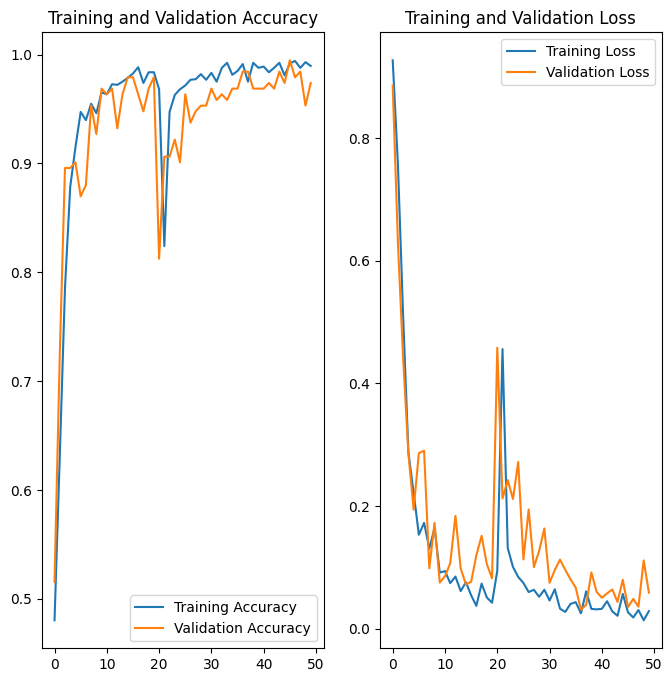

In [68]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8,8))
plt.subplot(1,2,1) # 1 row, 2 columns, 1st subplot
plt.plot(range(EPOCHS),acc,label='Training Accuracy')           # x-axis - range(EPOCHS), y-axis - acc
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
#plt.yticks(np.arange(0, 1.1, 0.1))  # Set y-axis ticks from 0 to 1 with a step of 0.1

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training Loss') 
plt.plot(range(EPOCHS),val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [69]:
np.argmax([5.3150830e-09,1.0000000e+00,2.4696558e-09])
# argmax returns the index of the maximum value in the array

1

#### **12. Making Predictions**
---
- Prediction: Predicts classes and confidence levels for images in the test dataset.

first image to predict
first image's actual label:  1
actual label:  Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
[1.7629260e-07 9.9999988e-01 1.9770475e-11]
predicted label:  Potato___Late_blight


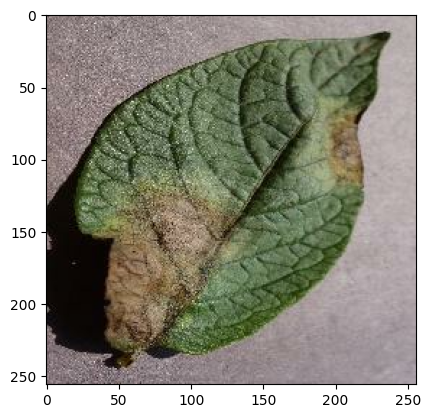

In [70]:
for images_batch, labels_batch in test_dataset.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("first image's actual label: ",first_label)
    print("actual label: ",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print(batch_prediction[0]) 
    print("predicted label: ",class_names[np.argmax(batch_prediction[0])])

In [71]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0) # Create a batch
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


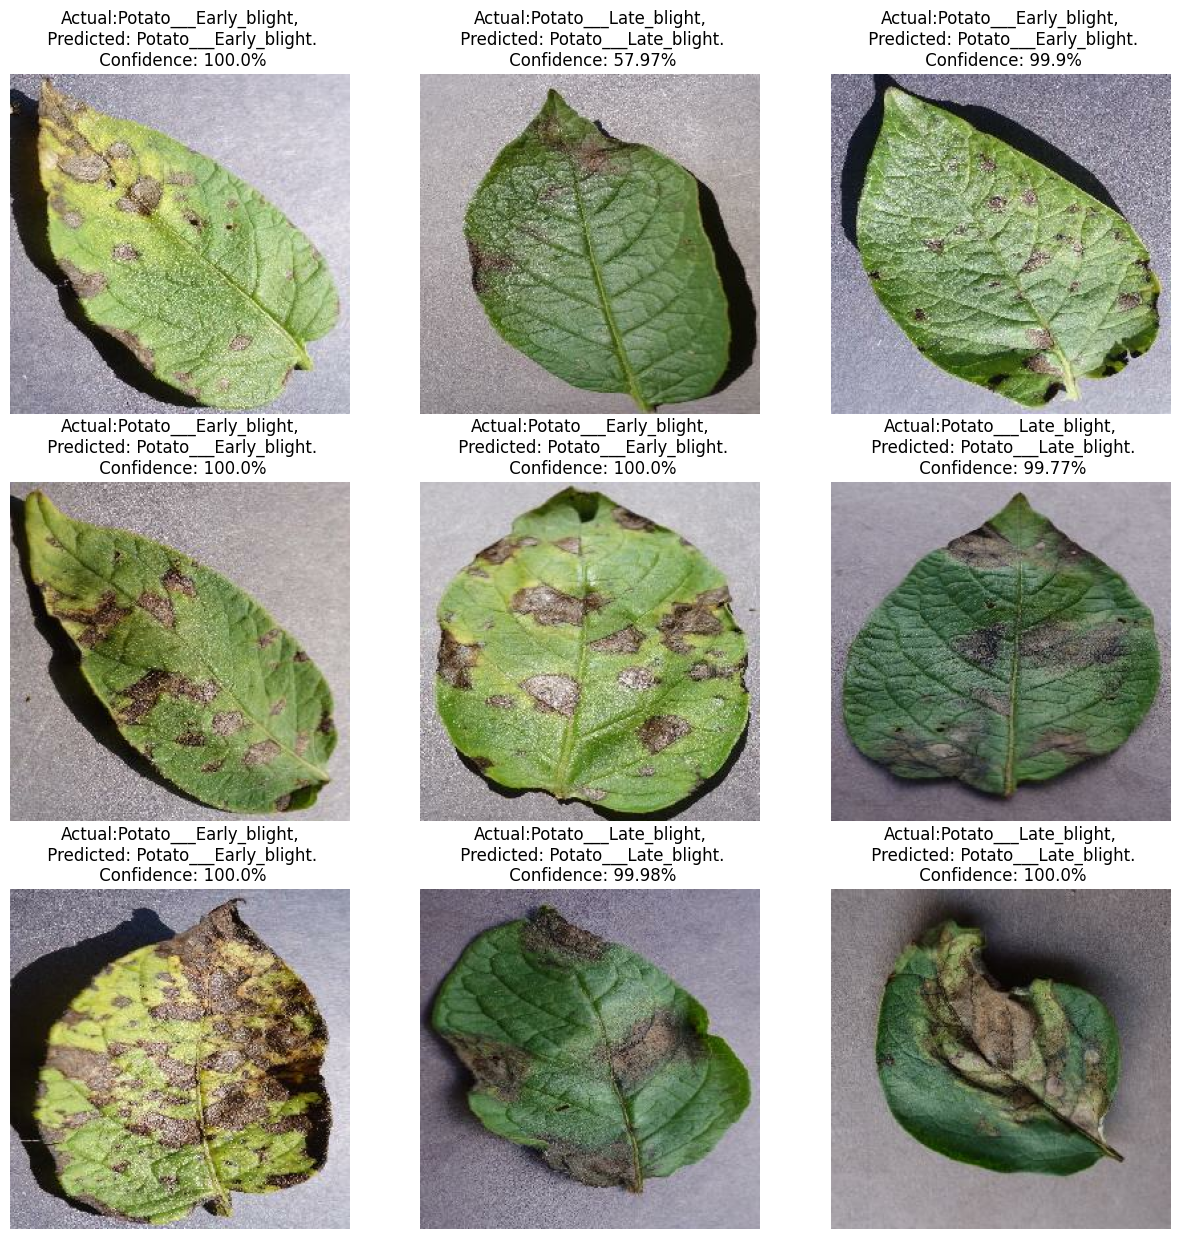

In [72]:
plt.figure(figsize=(15,15))
for images,labels in test_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        
        predicted_class,confidence = predict(model,images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual:{actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        #plt.title(f"Actual:{actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%",fontsize=9)
        plt.axis("off")

#### **13. Saving the Model**
---
- Saving: Saves the trained model to a file so it can be reloaded later without retraining.

In [73]:
model_version = 1
model.save(f"../saved_models/{model_version}.keras")

In [74]:
import os
os.environ['TF_USE_LEGACY_KERAS'] = '1'

In [75]:
new_model = tf.keras.models.load_model('../saved_models/1.keras')

# Show the model architecture
new_model.summary()

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_16 (Sequential)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_17 (Sequential)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_132 (Conv2D)             │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_132               │ (None, 127, 127, 32)   │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_133 (Conv2D)             │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_133               │ (None, 62, 62, 64)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_134 (Conv2D)             │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_134               │ (None, 30, 30, 64)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_135 (Conv2D)             │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_135               │ (None, 14, 14, 64)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_136 (Conv2D)             │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_136               │ (None, 6, 6, 64)       │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_137 (Conv2D)             │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_137               │ (None, 2, 2, 64)       │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_22 (Flatten)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 551,243 (2.10 MB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 367,496 (1.40 MB)

In [76]:
import os
os.listdir("../saved_models")

['1', '1.h5', '1.keras']

In [78]:
tf.saved_model.save(model, "C:/Users/meich/OneDrive - Asia Pacific University/Machine Learning and Data Science Project/Potato Disease Classification/saved_model/2")

TypeError: this __dict__ descriptor does not support '_DictWrapper' objects

In [79]:
model.save('C:/Users/meich/OneDrive - Asia Pacific University/Machine Learning and Data Science Project/Potato Disease Classification/saved_models')

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=C:/Users/meich/OneDrive - Asia Pacific University/Machine Learning and Data Science Project/Potato Disease Classification/saved_models.

In [80]:
model_version = 1
model.save(f"../saved_models/{model_version}.h5")

TypeError: cannot pickle 'module' object

In [81]:
model.save('C:/Users/meich/OneDrive - Asia Pacific University/Machine Learning and Data Science Project/Potato Disease Classification/saved_models/1', save_format='tf')


ValueError: The `save_format` argument is deprecated in Keras 3. Please remove this argument and pass a file path with either `.keras` or `.h5` extension.Received: save_format=tf